# Excercise 1: Perceptron
- define _step function_ that takes value (z) and returns 
Heaviside step function\
$
Heaviside(z) =
\begin{cases}
0\ \text{if}\ z<0\\
1\ \text{if}\ z \ge 0
\end{cases}
$
- define _Perceptron_ function that takes:
    - data: numpy array of shape (m,n)
    - labels: numpy array of shape (m,1)
    - lr: learning rate ($\eta$)
    - e: number of epochs
- add bias term (column with values equal to 1)
- initialize weights with zeros
- loop through epochs
    - loop through instances
        - compute output($\hat{y}$) as $Heaviside(z)$, where $z = x^T w$\
        NOTE: rows of X contain transposed data so use np.dot(x[i], w)
        - calculate new weights $w_{i,j}^{(next\,step)} = w_{i,j}+\eta(y_j-\hat y_j)x_i$
- return trained weights
- draw decision boundary
        



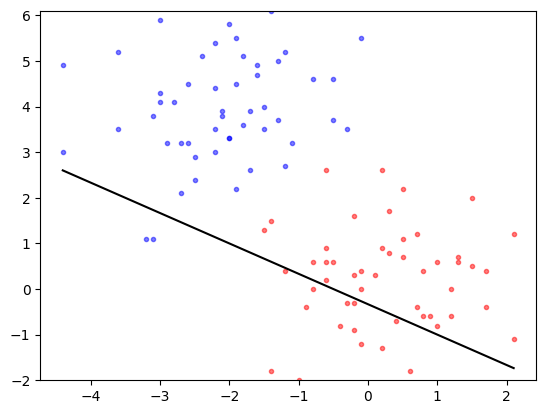

In [23]:
import matplotlib.pyplot as plt
import numpy as np
class_size = 50
# np.random.seed(42)
# Generate data points
X1 = np.random.normal(0,1,(class_size,2)).round(1)
X2 = np.random.normal(0,1,(class_size,2)).round(1)+np.random.randint(-5,5, (1,2))
X_train = np.concatenate((X1, X2))

# Generate labels
y_train = np.concatenate((np.zeros(class_size),np.ones(class_size)))

#plot data points
def plot_data(X,y):
    # plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r.',alpha=0.5)
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'b.',alpha=0.5)

# plot (dummy) decision boundary
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))

# Dummy weights
w_dummy = [1,2,3]

plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_dummy)


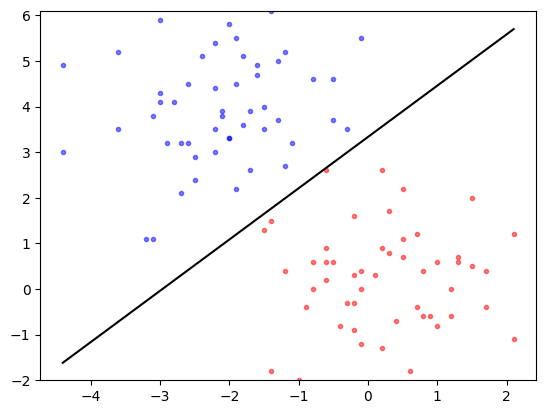

In [102]:
import numpy as np
def step_function(z):
  if z < 0: return 0
  else: return 1

def perceptron(data, labels, lr, e):
  bias = np.ones((data.shape[0], 1))
  data = np.append(bias, data, axis=1)
  weights = np.zeros((data.shape[1], 1))
  for epoch in range(e):
    for i in range(data.shape[0]):
      y_opt = step_function(np.dot(data[i], weights))
      # weights = weights + lr * (labels[i] - y_opt[0]) * data[i].reshape(-1, 1)
      weights = weights + np.dot(lr * (labels[i] - y_opt), data[i].reshape(-1, 1))
    # print(weights.reshape(1,-1))

  return weights
w = perceptron(X_train, y_train, 0.1, 20)
# print(w)
plot_data(X_train,y_train)
plot_decision_boundary(X_train, w)

Epoch: 0  Weights :  [[-0.1  -0.1   0.08]] x:  [ 1.   1.  -0.8] z:  0.0 y_hat:  1.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [ 1.  -1.4  1.5] z:  0.16000000000000003 y_hat:  1.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [ 1.  -0.3 -0.3] z:  -0.191 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [1.  1.3 0.6] z:  -0.19000000000000006 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [1.  0.5 2.2] z:  -0.3340000000000001 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [ 1.  -0.6  0.9] z:  -0.28700000000000003 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [1.  0.1 0.3] z:  -0.217 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [1.  1.5 0.5] z:  -0.17500000000000004 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [1.  0.5 1.1] z:  -0.25700000000000006 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.2   0.04 -0.07]] x:  [ 1.  -0.4 -0.8] z:  -0.1599999999

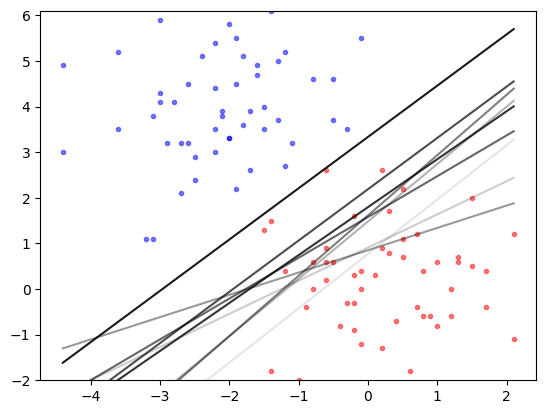

In [24]:
def step_function(z):
    return 1.0 if z>=0 else 0.0

def perceptron(data, labels, lr, e):
    """
    data: numpy array of shape (m,n)
    labels: numpy array of shape (m,1)
    lr: learning rate
    e: number of epochs
    """
    plot_data(data,labels)
    m,n = data.shape
    X = np.hstack([np.ones((m,1)),data])
    w = np.zeros((n+1,1))
    for i in range(e):
        for j in range(m):
            y = labels[j]
            x = X[j]
            z = np.dot(x,w)
            y_hat = step_function(z)
            w = w + np.dot(lr*(y-y_hat),x.reshape(-1,1))
            print("Epoch:", i," Weights : ", w.T,"x: ", x, "z: ", z[0], "y_hat: ", y_hat, "y: ", y)
        plot_decision_boundary(data, w, i/e)
    return w
w = perceptron(X_train, y_train, 0.1, 10)

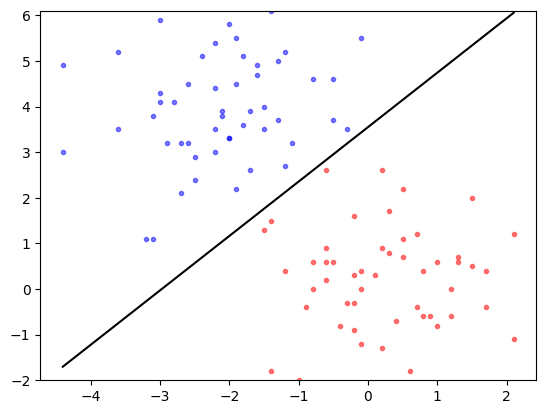

In [25]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X_train, y_train)
w_per = np.hstack([per_clf.intercept_,per_clf.coef_[0]])
plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_per)

In [95]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,),activation="sigmoid"),
])
model.compile(loss="binary_cross", optimizer=tf.keras.optimizers.SGD(lr=1e-2),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100)
model.evaluate(X_train, y_train)

Epoch 1/100
4/4 [==============================] - 0s 799us/step - loss: 0.1978 - accuracy: 0.6600
Epoch 2/100
4/4 [==============================] - 0s 866us/step - loss: 0.1955 - accuracy: 0.6600
Epoch 3/100
4/4 [==============================] - 0s 766us/step - loss: 0.1934 - accuracy: 0.6700
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.6700
Epoch 5/100
4/4 [==============================] - 0s 733us/step - loss: 0.1887 - accuracy: 0.6700
Epoch 6/100
4/4 [==============================] - 0s 809us/step - loss: 0.1871 - accuracy: 0.6900
Epoch 7/100
4/4 [==============================] - 0s 925us/step - loss: 0.1854 - accuracy: 0.6900
Epoch 8/100
4/4 [==============================] - 0s 939us/step - loss: 0.1839 - accuracy: 0.6900
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.6900
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.6900
Epoch 11/100
4/

[0.11857108026742935, 0.8299999833106995]

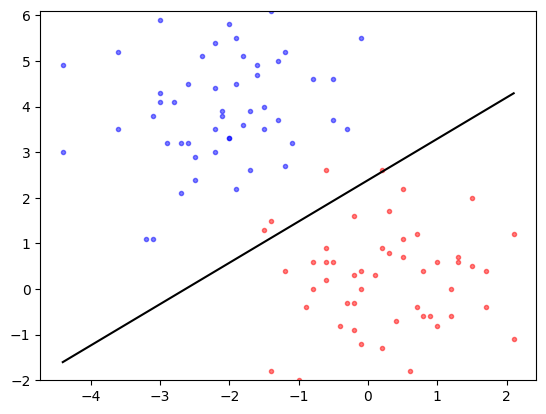

In [92]:
weights, biases = model.layers[0].get_weights()
w_keras = np.hstack([biases, weights.reshape(1,-1)[0]])
plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_keras)

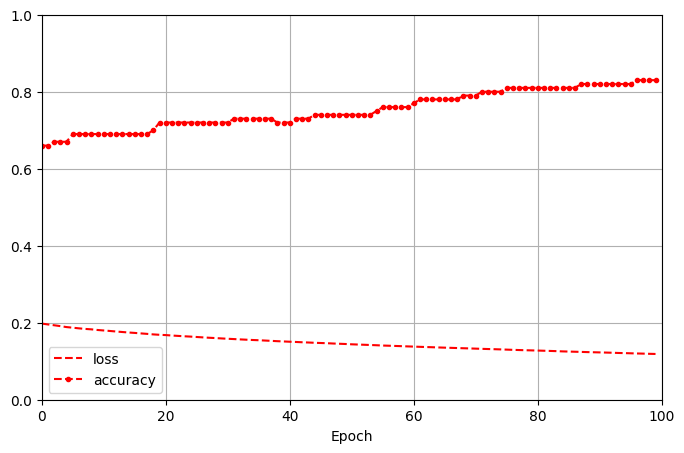

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 100], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()